   # Wizualizacja danych -  Ubezpieczenia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split as cv
from sklearn import preprocessing, metrics
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#Dzięki tej instrukcji wykresy będą pojawiać się pod wykonanym kodem a nie otwierać w osobnym oknie 
%matplotlib inline

## Zbiór danych
Wykorzystano zbiór danych na temat wniosków ubezpieczeniowych:
https://www.kaggle.com/c/prudential-life-insurance-assessment/download/train.csv.zip

## Opis danych

Zbiór zawiera się 127 atrybutów oraz atrybut decyzyjny __response__, który przyjmuje wartoci 1-8 określające ryzyko ubezpieczeniowe. Ilość rekodów jest bliska 60000 każdy jeden wiersz odpowiada jednemu wnioskowi ubezpieczeniowemu.

|__Variable__|__Description__|
|-:|:-|
|__Id__|Unikalny identyfikator wniosku ubezpieczeniowego|
|__Product_Info_1-7__|Atrybuty znormalizowane na temat złozonego wniosku|
|__Ins_Age__|Znormalizowany wiek wniowskodawcy|
|__Ht__|Znormalizowany wiek wniowskodawcy|
|__Wt__|Znormalizowana waga wniowskodawcy|
|__BMI__|Znormalizowany współczynnik BMI wniowskodawcy|
|__Employment_Info_1-6__|Znormalizowane atrybuty nt. zatrudnienia wnioskodawcy|
|__InsuredInfo_1-6__|Znormalizowane atrybuty nt. wnioskodawcy|
|__Insurance_History_1-9__|Znormalizowane atrybuty nt. historii ubezpieczeń wnioskodawcy|
|__Family_Hist_1-5__|Znormalizowane atrybuty nt. historii rodziny wnioskodawcy|
|__Medical_History_1-41__|Znormalizowane atrybuty nt. historii medycznej wnioskodawcy|
|__Medical_Keyword_1-48__|Atrybuty z wartościami zastępczymi. Odnoszą się do obecności / braku medycznego słowa kluczowego|
|__Response__|Atrybut decyzyjny związany z ostateczną decyzją dotyczącą wniosku|

## Read in the Data

In [2]:
df = pd.read_csv('train.csv', sep =',')
df.head()

,"Ggg""Id""",Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


## Wizualizacja rozkładu klas

<AxesSubplot:xlabel='Response', ylabel='count'>

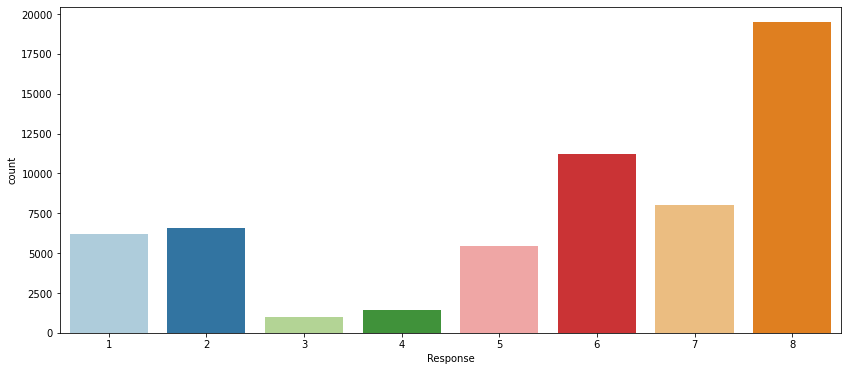

In [3]:
plt.rcParams['figure.figsize'] = (14.0,6.0)
sns.countplot(x='Response',data=df,palette="Paired", order = range(1,9))

## Przedstawienie wartości pustych

In [4]:
print("Atrybut  \t\t| Liczba nulli | Procent z całego zbioru")
for i,c in df.T.iterrows():
    count = sum(c.isnull())
    if count >0:         
        print("%s   \t\t%5d   \t%.2f%%"  %(i, count, (count/59381)*100))

Atrybut  		| Liczba nulli | Procent z całego zbioru
Employment_Info_1   		   19   	0.03%
Employment_Info_4   		 6779   	11.42%
Employment_Info_6   		10854   	18.28%
Insurance_History_5   		25396   	42.77%
Family_Hist_2   		28656   	48.26%
Family_Hist_3   		34241   	57.66%
Family_Hist_4   		19184   	32.31%
Family_Hist_5   		41811   	70.41%
Medical_History_1   		 8889   	14.97%
Medical_History_10   		58824   	99.06%
Medical_History_15   		44596   	75.10%
Medical_History_24   		55580   	93.60%
Medical_History_32   		58274   	98.14%


## Obsługa wartości pustych

Tutaj widać, że wśród atrybutów jest kilka różnych rozkładów wartości.

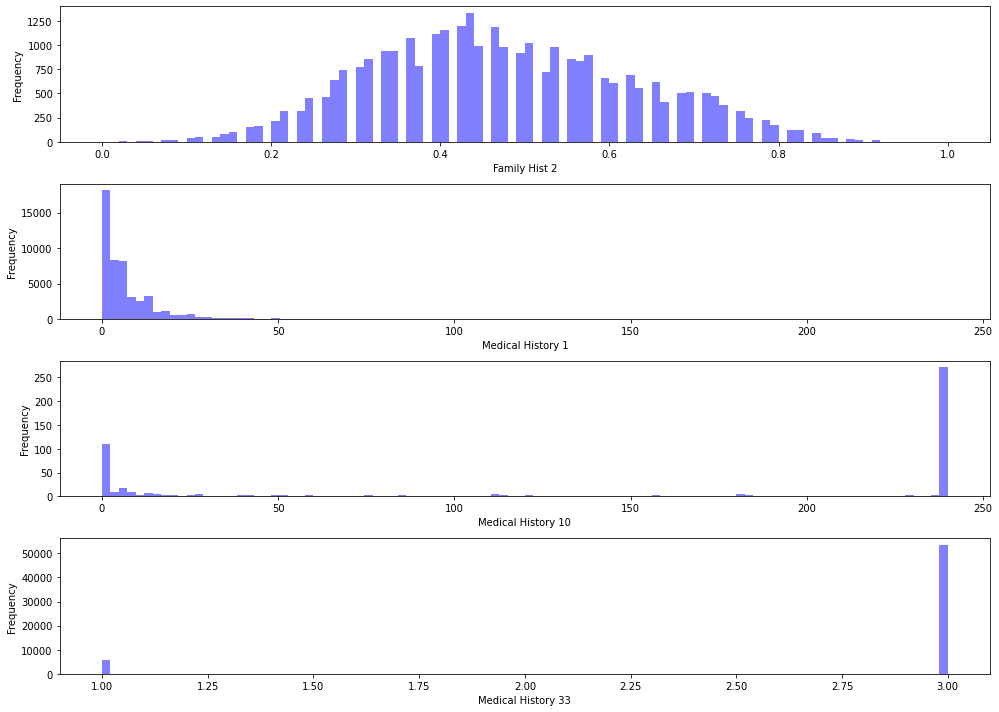

In [5]:
plt.rcParams['figure.figsize'] = (14.0, 10.0)

plt.subplot(4,1,1)    
df['Family_Hist_2'].plot(kind = 'hist',color='blue',bins= 100, alpha = 0.5)
plt.xlabel('Family Hist 2')

plt.subplot(4,1,2)
df['Medical_History_1'].plot(kind = 'hist',color='blue',bins = 100, alpha = 0.5)
plt.xlabel('Medical History 1')

plt.subplot(4,1,3)
df['Medical_History_10'].plot(kind = 'hist',color='blue', bins =100, alpha = 0.5)
plt.xlabel('Medical History 10')

plt.subplot(4,1,4)
df['Medical_History_33'].plot(kind = 'hist',color='blue', bins =100, alpha = 0.5)
plt.xlabel('Medical History 33')

plt.tight_layout()

Patrząc na typy funkcji, które są dostępne widać, że wszystkie są numeryczne z wyjątkiem „Product_Info_2”, który jest alfanumeryczny obejct.

In [6]:
df.dtypes.value_counts()


int64      109
float64     18
object       1
dtype: int64

"Product_Info_2" typ zostanie zmieniony poprzez rozkład czynników. 

In [7]:
x = pd.factorize(df.iloc[:,2])
x = x[0]
df['Product_Info_2'] = x


Przy ponad 100 cechach zostały usunięte te, które mają powyżej 50% zbioru reszta zostaje uzupełniona medianą lub podłogą w zależności od potrzeby.

In [8]:
df.drop(['Medical_History_32','Medical_History_24','Medical_History_10',
         'Medical_History_15','Family_Hist_5','Family_Hist_3'],axis =1, inplace = True)

df.fillna(df.median(axis= 1),inplace = True)
df.fillna(method = 'pad',inplace = True)
df.fillna(method = 'bfill',inplace = True)


print("Ilość kolumn z nullami: ")
#.sum() dla kolumny drugi .sum() suma nulli ze wszystkich kolumn
df.isnull().sum().sum()

Ilość kolumn z nullami: 


0

Oddzielono kolumnę decyzyjną od wektora wniosku ubezpieczeniowego

In [9]:
Xpd = df.iloc[:,1:-1]
y = df.iloc[:,-1:]


Skalowanie danych dla algorytmów uczenia maszynowego

In [10]:
X = preprocessing.scale(Xpd)
y = np.asarray(y).flatten().astype(float)

Użyto TrainTestSplit z Sckit-Learn do utworzenia zestawów szkoleniowych i walidacyjnych.

In [11]:
Xtrain, Xtest, Ytrain, Ytest = cv(X,y,test_size = 0.3,random_state = 1)

## Wybrany klasfyikator

Wybrano klasyfikator Ekstremalnie Losowe Drzewa - „ExtraTreesClassifier” od scikit learn.
Powodem wyobur jest: odporność na nadmierne dopasowanie; zapewnia średnią z wielu losowo próbkowanych funkcji z naszego zestawu funkcji; 
w przeciwieństwie do Lasów losowych, z którym jest luźno oparty, ExtraTrees wybiera funkcje losowo, a nie najbardziej dyskryminujący próg, 
co pomaga zmniejszyć wariancję; Ponieważ użyto (stosunkowo) małego zbioru danych n = 60000 użyto 100 drzew.

In [12]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state =0)

clf.fit(Xtrain,Ytrain)


ExtraTreesClassifier(random_state=0)

Przedstawienie najważniejszych cech
Widać, że 20 najważniejszych funkcji ma ponad 50% znaczenia w przedstawionym modelu.

Text(0.5, 0, 'Ważność %')

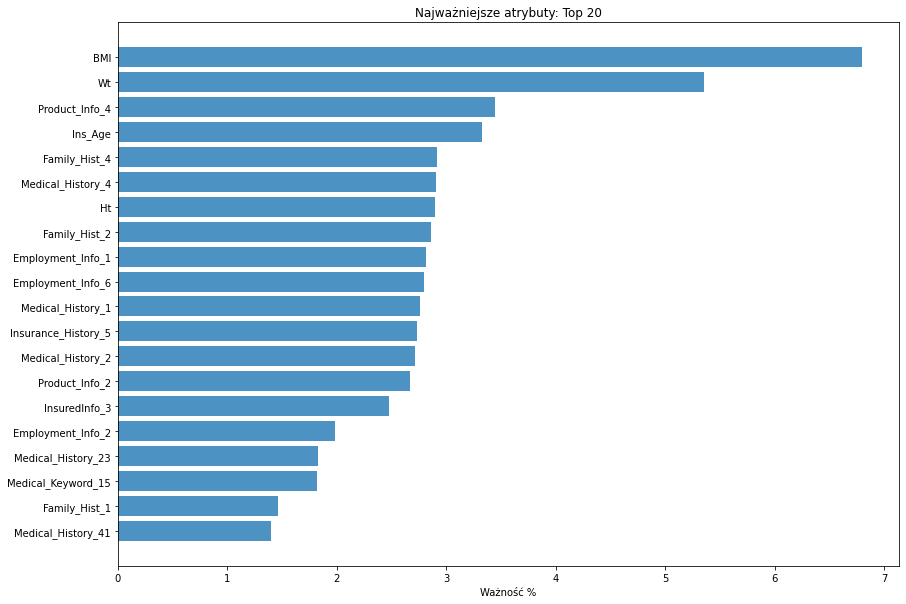

In [13]:
imp = pd.DataFrame({'features':Xpd.columns,'importance':clf.feature_importances_})

imp_head = imp.sort_values(by = 'importance', ascending =False)[:20]
imp_head = imp_head.sort_values(by = 'importance', ascending = True)

plt.rcParams['figure.figsize'] = (14.0,10.0)
plt.barh(np.arange(len(imp_head))+.5,imp_head.importance*100,
         align = 'center', alpha = 0.8)
plt.yticks(np.arange(len(imp_head))+.5, imp_head.features.values)         
plt.title('Najważniejsze atrybuty: Top 20')
plt.xlabel('Ważność %')


Przedstawienie wszystkich wykresów atrybutów, aby przedsatawić zależności. Np. Waga ma ścisły związek z BMI.

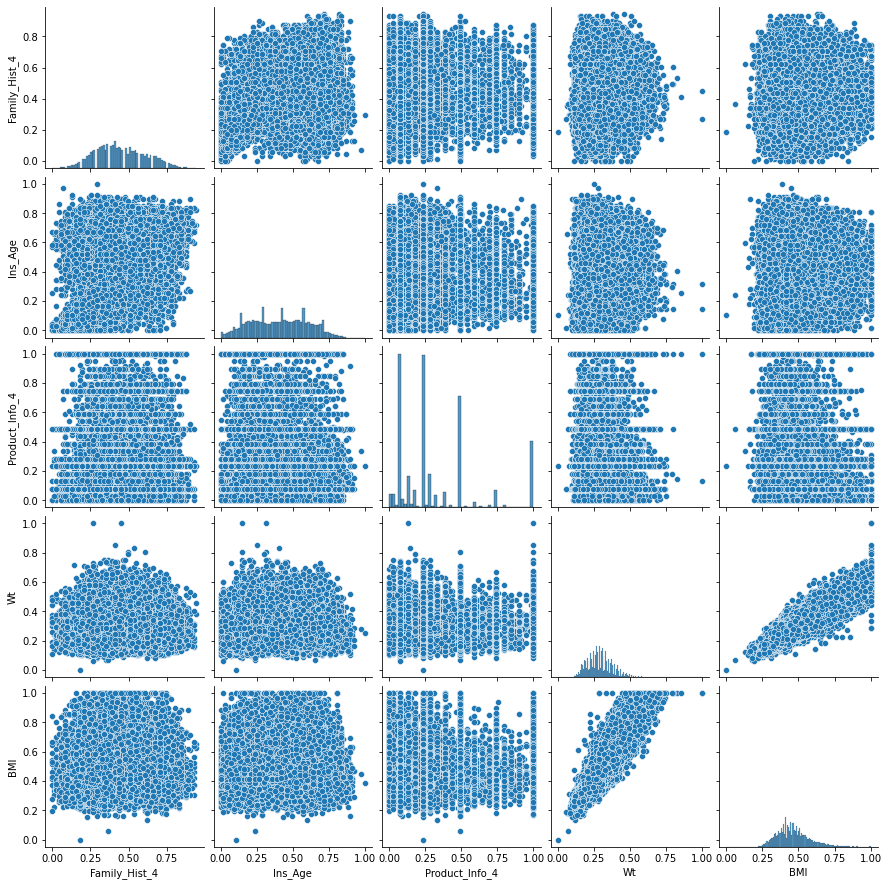

In [14]:
sns.pairplot(df[imp_head.features[-5:]])

Dodatkowa anliza dla wzrostu, wagi i BMI pokazuje najczęstsze decyzje dla wartości danego parametru.

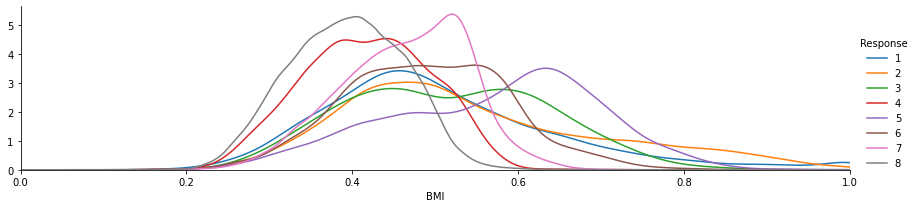

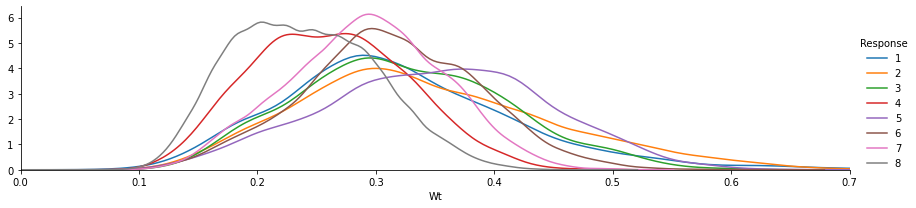

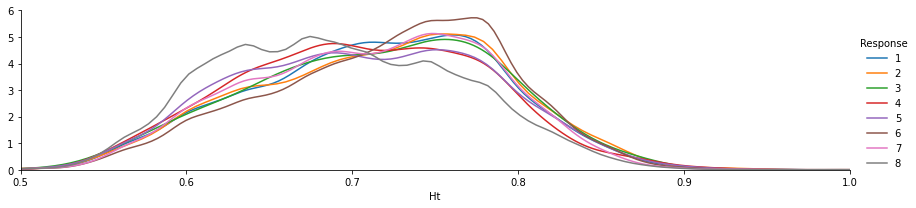

In [15]:
dist_plot = sns.FacetGrid(df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8])
dist_plot.map(sns.kdeplot,'BMI')

dist_plot.add_legend()
dist_plot.set(xlim=(0, 1.0))

dist_plot = sns.FacetGrid(df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8])
dist_plot.map(sns.kdeplot,'Wt')

dist_plot.add_legend()
dist_plot.set(xlim=(0, 0.7))

dist_plot = sns.FacetGrid(df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8])
dist_plot.map(sns.kdeplot,'Ht')

dist_plot.add_legend()
dist_plot.set(xlim=(0.5, 1.0))


## Prognoza

„Porządkowy” charakter zmiennej odpowiedzi (ocena ryzyka) oznacza, że będziemy musieli użyć dodaktowych narzędzi aby dospasować model do celu.


Użyto Gradient Boosting Regressor dla jego wydajności i Grid Search Cross Validation aby przeprowadzić walidację krzyżową i wybrano hiperparametry.

In [22]:
a1 = GradientBoostingRegressor(loss = 'huber', learning_rate = 0.2,
                               max_depth = 1)    
a1fit = a1.fit(Xtrain,Ytrain)    


a1pred= a1fit.predict(Xtest)

a1pred[:5]

array([2.7243947 , 7.14760248, 6.40172686, 7.08352828, 4.831419  ])

Przygotowanie punktów odcięcia

In [18]:
preds  =a1pred
splits = [1,2,3,4,5,6,7,8]
resp = np.digitize(preds,splits,right =False)


Zamiana prognozy poniżej 1 na 1 i wyswietlenie pierwszych 

In [21]:
def convert(preds):
    global ones 
    ones= []
    for i in preds:
        if i==0:
            i=1
        ones.append(i)
    return ones
    
    
convert(resp)
# pierwsze 20 wyników. 
ones[:20]


[2, 7, 6, 7, 4, 6, 5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 5, 7, 5, 5]

## Wnioski

Przedstawiono analizę pod względem predykcji oraz zwizualizowano dane zgodnie z poleceniem. 
Dzięki możliwości przedstawienie wizualizacji można łatwo przedstawić dane dobór sposobów wizualizacji jest kluczowy, aby wiadomości zawarte w danych zostały łatwo odczytane. 
